# 1 Data Processing

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

df_tree= pd.read_csv('./MLdata.csv')

#df_tree_test = pd.read_csv('C:/Users/MI/Desktop/testing.csv')
#frames = [df_tree_train, df_tree_test]
#df_tree = pd.concat(frames)
#sort by class
#df_tree = df_tree.sort_values(by=['class'])

df_tree.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [63]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### Show the basic relation between different features

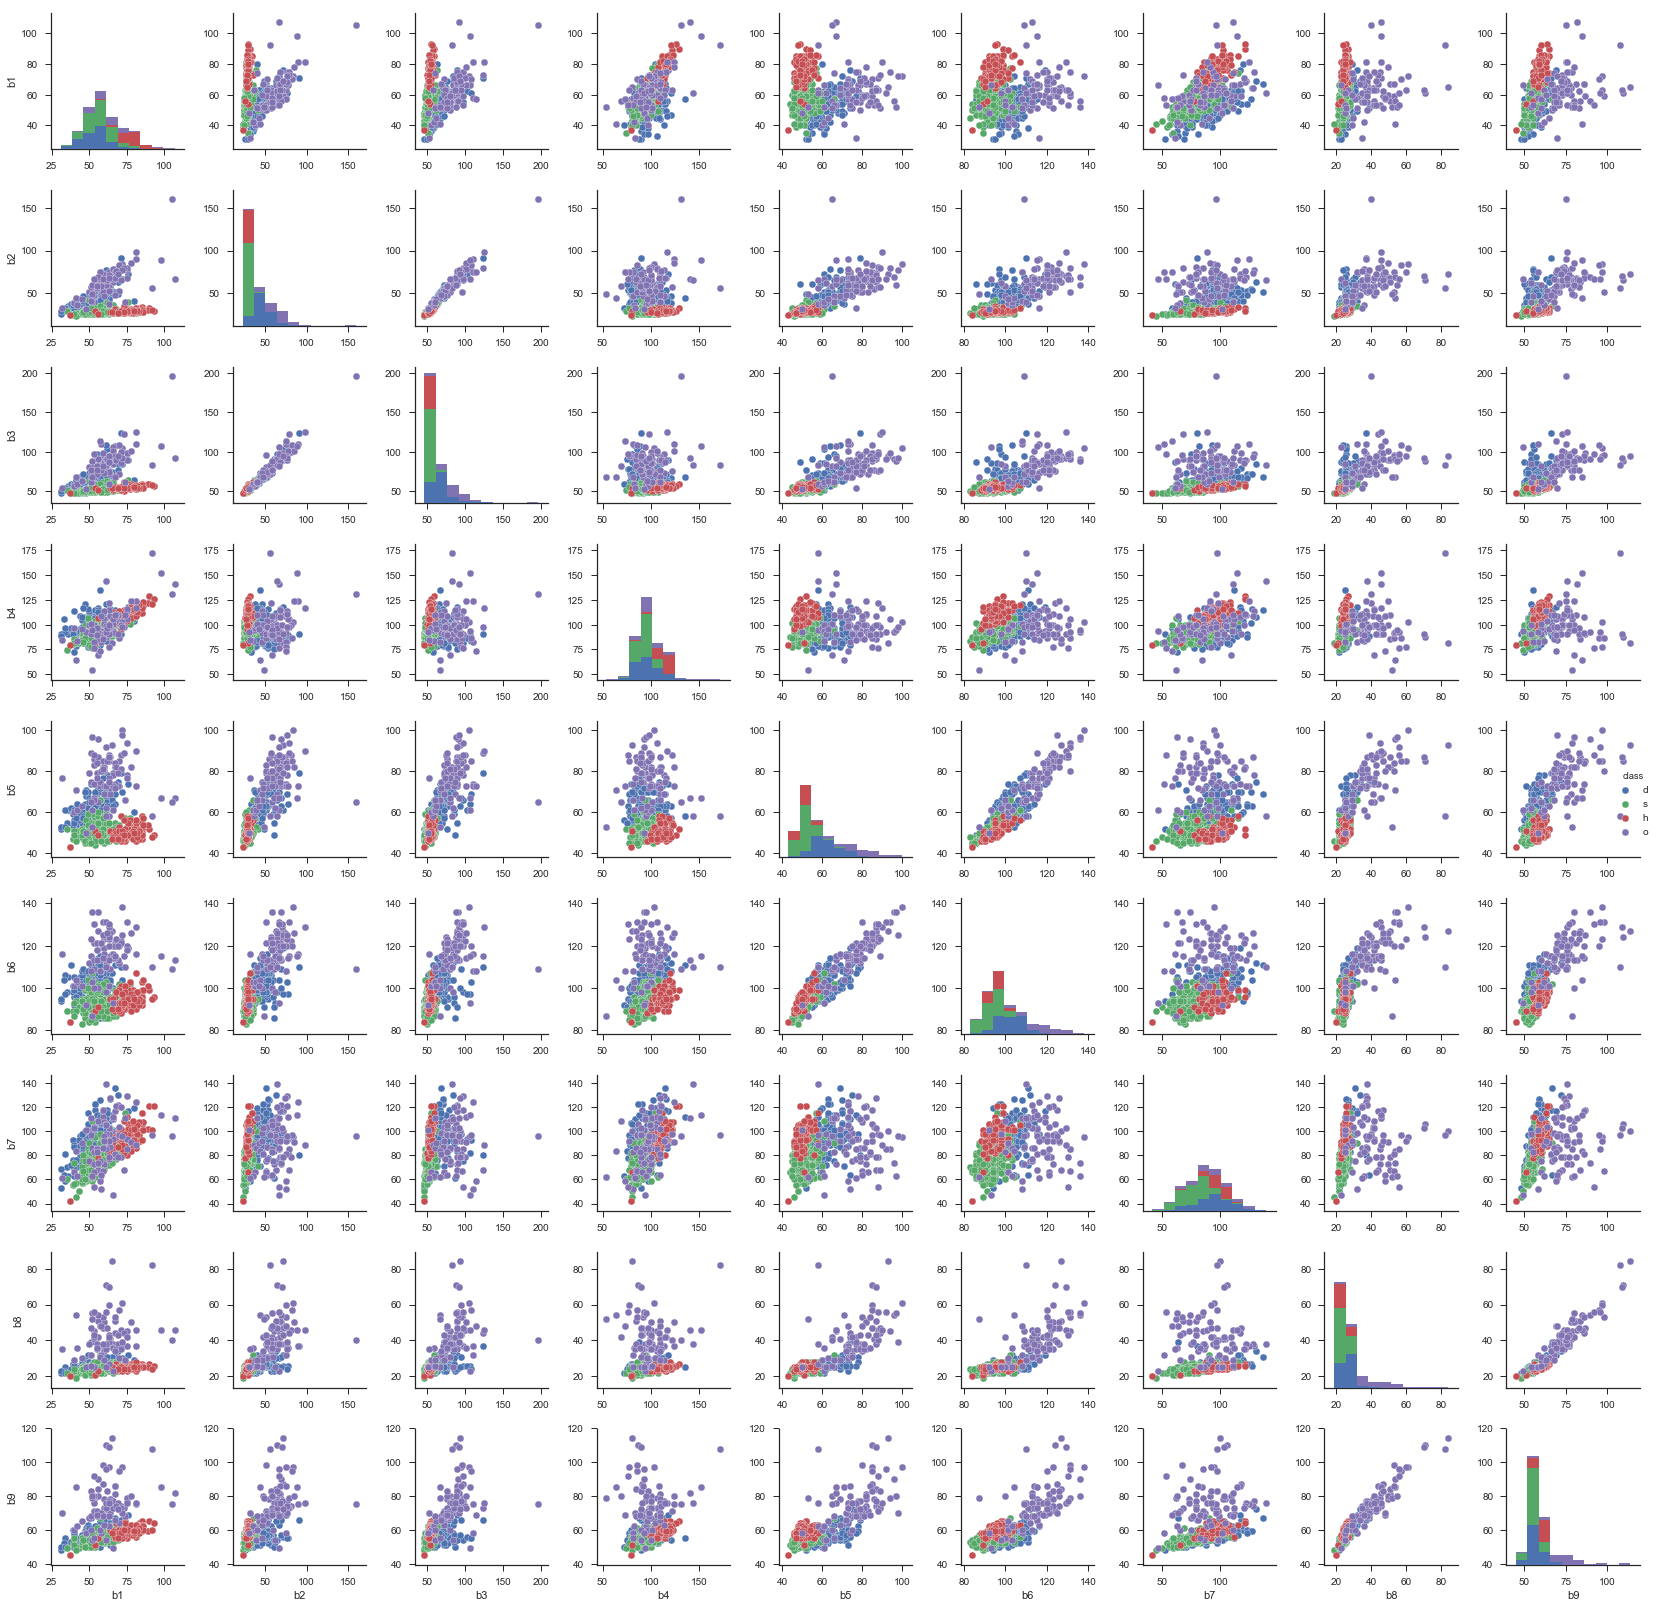

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cols = ['class', 'b1', 'b2', 'b3','b4','b5','b5','b6','b7','b8','b9']

cols = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
sns.pairplot(df_tree[cols], hue="class", size = 2.5)

plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

### Encode the class labels with numbers

In [14]:
class_mapping={label:idx for idx,label in enumerate(np.unique(df_tree['class']))}
df_tree['class']=df_tree['class'].map(class_mapping)
X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values



In [15]:
from sklearn.model_selection import train_test_split

X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 2 PCA 

## 2-1 PCA inner workings, step by step without sklearn package
### The resulting plot indicates that the first principal component alone accounts for about 40% of variance


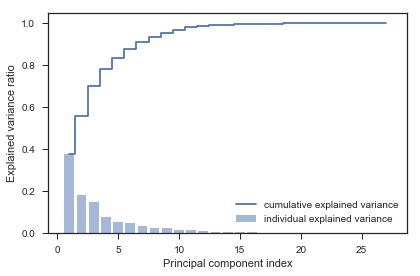

In [16]:

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#print('\nEigenvalues \n%s' % eigen_vals)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 28), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 28), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

### As we can see in the resulting plot, the data is more spread along the x-axis,the first principal component,than the PC2, which is consistent with the explained variance ratio plot that we created above.

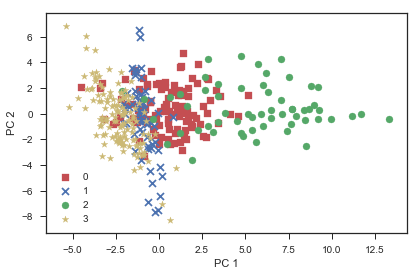

In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
#print('Matrix W:\n', w)

X_train_std[0].dot(w)

X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

## 2-2 Using PCA from sklearn

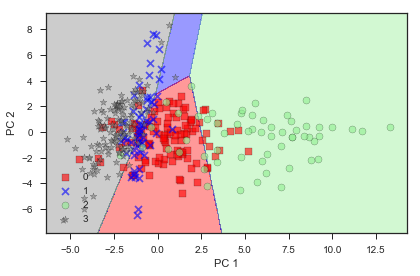

In [18]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '*', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

        
        
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

### plot the test dataset to see if it can separate the classes well 

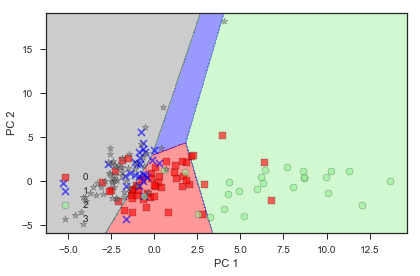

In [19]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

In [20]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.76984423e-01, 1.79724577e-01, 1.45866478e-01, 7.71804942e-02,
       5.31438600e-02, 4.55079888e-02, 3.13787016e-02, 2.35841076e-02,
       2.09172593e-02, 1.31545580e-02, 1.23085434e-02, 6.55347806e-03,
       4.34813111e-03, 2.24750937e-03, 1.91606626e-03, 1.26474942e-03,
       1.01914128e-03, 9.84212949e-04, 9.14493726e-04, 4.61000214e-04,
       2.79416463e-04, 1.19637858e-04, 9.57410047e-05, 3.11704234e-05,
       9.80294280e-06, 3.45640011e-06, 1.00132490e-06])

# 3 LDA

## 3-1 The inner workings of LDA

In [21]:
#LDA
#Supervised data compression via linear discriminant analysis

np.set_printoptions(precision=4)
mean_vecs = []
for label in range(0, 4):
    print(label)
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label]))

0
MV 0: [-0.5276  0.4786  0.3956 -0.231   0.371   0.2192  0.3989 -0.2042 -0.3272
  0.5178 -0.4737 -0.3933  0.2491 -0.3731 -0.224  -0.3894  0.2203  0.344
 -0.0403 -0.112  -0.1491  0.0557 -0.012  -0.0661 -0.0232 -0.0398 -0.0545]

1
MV 1: [ 1.5245 -0.6822 -0.5258  1.2426 -0.7048 -0.434   0.612  -0.3452  0.0323
 -1.4869  0.656   0.4608 -1.1831  0.699   0.4155 -0.5713  0.3434 -0.034
 -0.1125 -0.0527 -0.0535 -0.1153 -0.1083 -0.1174 -0.1499  0.0715  0.053 ]

2
MV 2: [ 0.1598  1.5171  1.5027  0.1077  1.6099  1.6329  0.2293  1.7733  1.7037
 -0.1747 -1.4789 -1.412  -0.187  -1.6095 -1.6451 -0.2804 -1.7677 -1.7055
  0.1637  0.1681  0.2191  0.1142  0.2365  0.2539  0.2225  0.1701  0.1291]

3
MV 3: [-0.3078 -0.7312 -0.7265 -0.4027 -0.6735 -0.6788 -0.6883 -0.4341 -0.4703
  0.3056  0.7226  0.7146  0.3955  0.6776  0.696   0.6845  0.4194  0.4582
  0.0126  0.0427  0.0514 -0.0431 -0.043  -0.0025 -0.0097 -0.0711 -0.0337]



In [22]:
d = 27 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

#print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))
mean_overall = np.mean(X_train_std, axis=0)
d = 27  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Between-class scatter matrix: 27x27
Eigenvalues in descending order:

7.842885716548684
2.0617190884238923
0.23978348934247168
1.6073307085461886e-11
3.670676514618053e-12
1.6837461734356241e-12
1.6837461734356241e-12
9.146351981821225e-13
9.146351981821225e-13
7.696872887566849e-13
5.722003365069921e-13
5.722003365069921e-13
3.691775496973449e-13
3.691775496973449e-13
6.605620996442086e-14
3.159097399121279e-14
3.159097399121279e-14
2.5320718337640315e-14
2.5320718337640315e-14
1.967957187794191e-14
1.3321582284663166e-14
7.794136585687161e-15
7.794136585687161e-15
2.5825796704158002e-15
1.4628985787304392e-15
1.4628985787304392e-15
1.1109400467939528e-15


###  We plot the linear discriminants by decreasing eigenvalues. As we can see from the figure, the first three linear discriminants alone capture 100% of useful information in the dataset.

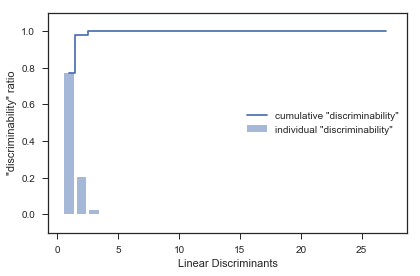

In [23]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 28), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 28), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [46]:
# Stack the two most discriminative eigenvector columns to creat the transforation matrix
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
#print('Matrix W:\n', w)

### Using the transformation matric, we transform the training dataset. 
### Now the four forests classes are perfectly linearly separable.

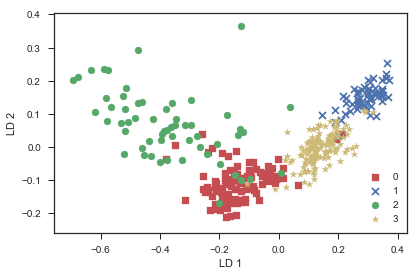

In [25]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

## 3-2 Using LDA from sklearn

In [26]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.fit_transform(X_test_std, y_test)

# 4 Models

## 4-1 LogisticRegression Model

In [27]:
y_train

array([0, 3, 2, 3, 0, 1, 2, 3, 1, 0, 3, 0, 3, 0, 2, 2, 2, 1, 3, 0, 3, 0,
       2, 1, 1, 1, 0, 3, 0, 3, 0, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       0, 0, 2, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 1, 0, 1, 0, 0, 1, 0, 3,
       1, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 2, 3, 0, 1, 3, 0, 0, 0, 3, 3,
       3, 3, 1, 2, 3, 0, 0, 3, 0, 2, 3, 0, 3, 0, 3, 2, 1, 1, 1, 3, 3, 0,
       2, 3, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 2, 3, 2, 2, 3, 1,
       1, 0, 3, 0, 2, 1, 3, 3, 2, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 1, 2, 1, 3, 0, 0, 0, 2, 1, 2, 1, 0, 3, 3, 0, 3, 1, 2, 0, 0,
       0, 2, 0, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 1, 3, 0, 0, 3, 0, 0, 3,
       2, 3, 2, 3, 1, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 2, 2, 3, 2,
       1, 0, 3, 0, 3, 0, 0, 1, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 1, 0, 3, 0,
       0, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 0, 3, 2, 1, 3, 3, 3, 2, 0, 1, 1,
       1, 3, 0, 2, 3, 2, 3, 3, 3, 1, 2, 0, 1, 2, 0, 0, 0, 2, 3, 1, 1, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 1, 2, 3, 0, 3, 0, 0,

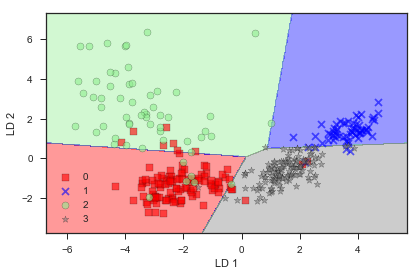

Misclassified samples: 51
Accuracy: 0.675159


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

y_pred=lr.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

## 4-2 Perceptron

C:\Users\Rodermans\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


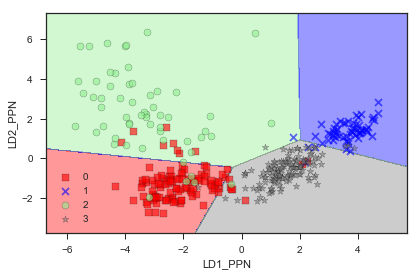

Misclassified samples: 50
Accuracy: 0.681529


In [29]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=40,eta0=0.2,random_state=1)
ppn.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=ppn)
plt.xlabel('LD1_PPN')
plt.ylabel('LD2_PPN')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

y_pred=ppn.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())

print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

## 4-3 SVM_linear

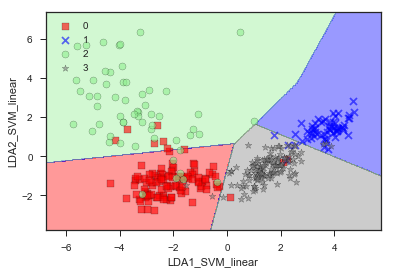

Misclassified samples: 32
Accuracy: 0.796178


In [30]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=svm)
plt.xlabel('LDA1_SVM_linear')
plt.ylabel('LDA2_SVM_linear')
plt.legend(loc='upper left')
plt.show()

y_pred=svm.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))


## 4-4 SVM_rbf

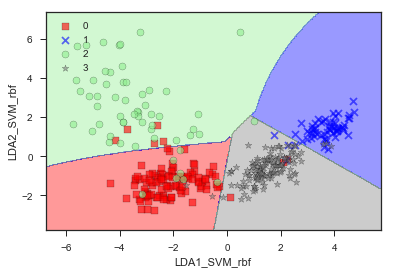

Misclassified samples: 29
Accuracy: 0.815287


In [31]:
svm2=SVC(kernel='rbf',random_state=1,gamma=0.01,C=10.0)
svm2.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train, classifier=svm2)

plt.xlabel('LDA1_SVM_rbf')
plt.ylabel('LDA2_SVM_rbf')
plt.legend(loc='upper left')

plt.show()

y_pred=svm2.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

## 4-5 KNN

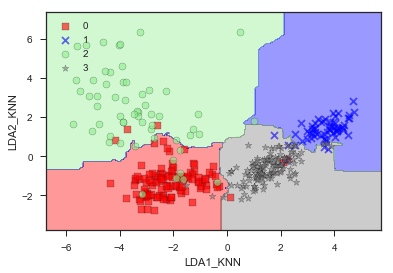

Misclassified samples: 28
Accuracy: 0.821656


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=1,metric='minkowski')
knn.fit(X_train_lda,y_train)

plot_decision_regions(X_train_lda, y_train, classifier=knn)

plt.xlabel('LDA1_KNN')
plt.ylabel('LDA2_KNN')
plt.legend(loc='upper left')

plt.show()

y_pred=knn.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

## 4-6 Decision Tree

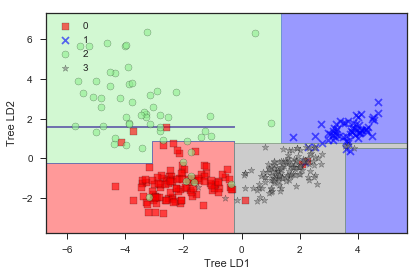

Misclassified samples: 34
Accuracy: 0.783439


In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_lda, y_train)

#X_combined = np.vstack((X_train_lda, X_test_lda))
#y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_train_lda, y_train, 
                      classifier=tree)

plt.xlabel('Tree LD1')
plt.ylabel('Tree LD2')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

y_pred=tree.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

## 4-7 Random Forests

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_lda, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest)

plt.xlabel('Forest LD1')
plt.ylabel('Forest LD2')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

y_pred=forest.predict(X_test_lda)
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print('Accuracy: %2f' % accuracy_score(y_test,y_pred))

NameError: name 'X_combined' is not defined

## 5 Neural Network

In [65]:
#Reduce features to first nine, because to many features decrease the degree of freedom of the model
df_tree= pd.read_csv('./MLdata.csv')
import re
[i for i in df_tree.columns if re.findall('pre', i)]
drop_labels = ['class']
drop_labels.extend([i for i in df_tree.columns if re.findall('pre', i)])
x=df_tree.drop(drop_labels, axis=1)

#turn the categorial data into dummies
y=pd.get_dummies(df_tree['class'])

In [66]:
#import tersorflow
import tensorflow as tf
from tensorflow.keras import layers
print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [67]:
model = tf.keras.Sequential()
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [68]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(np.array(x), np.array(y), epochs=800, batch_size=32)

Epoch 1/800
523/523 [==============================] - 0s 78us/step - loss: 8.7268 - acc: 0.4436
Epoch 2/800
523/523 [==============================] - 0s 67us/step - loss: 8.7285 - acc: 0.4436
Epoch 3/800
523/523 [==============================] - 0s 67us/step - loss: 8.7265 - acc: 0.4417
Epoch 4/800
523/523 [==============================] - 0s 65us/step - loss: 8.7259 - acc: 0.4474
Epoch 5/800
523/523 [==============================] - 0s 71us/step - loss: 8.7275 - acc: 0.4417
Epoch 6/800
523/523 [==============================] - 0s 57us/step - loss: 8.7290 - acc: 0.4455
Epoch 7/800
523/523 [==============================] - 0s 72us/step - loss: 8.7257 - acc: 0.4474
Epoch 8/800
523/523 [==============================] - 0s 42us/step - loss: 8.7282 - acc: 0.4455
Epoch 9/800
523/523 [==============================] - 0s 44us/step - loss: 8.7262 - acc: 0.4436
Epoch 10/800
523/523 [==============================] - 0s 54us/step - loss: 8.7290 - acc: 0.4436
Epoch 11/800
523/523 [=======

523/523 [==============================] - 0s 67us/step - loss: 8.7288 - acc: 0.4474
Epoch 85/800
523/523 [==============================] - 0s 69us/step - loss: 8.7265 - acc: 0.4455
Epoch 86/800
523/523 [==============================] - 0s 72us/step - loss: 8.7261 - acc: 0.4417
Epoch 87/800
523/523 [==============================] - 0s 72us/step - loss: 8.7271 - acc: 0.4455
Epoch 88/800
523/523 [==============================] - 0s 74us/step - loss: 8.7279 - acc: 0.4436
Epoch 89/800
523/523 [==============================] - 0s 59us/step - loss: 8.7254 - acc: 0.4436
Epoch 90/800
523/523 [==============================] - 0s 78us/step - loss: 8.7309 - acc: 0.4436
Epoch 91/800
523/523 [==============================] - 0s 59us/step - loss: 8.7235 - acc: 0.4455
Epoch 92/800
523/523 [==============================] - 0s 57us/step - loss: 8.7254 - acc: 0.4474
Epoch 93/800
523/523 [==============================] - 0s 59us/step - loss: 8.7292 - acc: 0.4417
Epoch 94/800
523/523 [===========

523/523 [==============================] - 0s 32us/step - loss: 8.7277 - acc: 0.4455
Epoch 167/800
523/523 [==============================] - 0s 50us/step - loss: 8.7265 - acc: 0.4455
Epoch 168/800
523/523 [==============================] - 0s 55us/step - loss: 8.7277 - acc: 0.4474
Epoch 169/800
523/523 [==============================] - 0s 67us/step - loss: 8.7228 - acc: 0.4455
Epoch 170/800
523/523 [==============================] - 0s 69us/step - loss: 8.7407 - acc: 0.4359
Epoch 171/800
523/523 [==============================] - 0s 50us/step - loss: 8.7289 - acc: 0.4474
Epoch 172/800
523/523 [==============================] - 0s 38us/step - loss: 8.7261 - acc: 0.4455
Epoch 173/800
523/523 [==============================] - 0s 57us/step - loss: 8.7266 - acc: 0.4436
Epoch 174/800
523/523 [==============================] - 0s 59us/step - loss: 8.7265 - acc: 0.4417
Epoch 175/800
523/523 [==============================] - 0s 76us/step - loss: 8.7275 - acc: 0.4417
Epoch 176/800
523/523 [=

523/523 [==============================] - 0s 55us/step - loss: 8.7349 - acc: 0.4417
Epoch 249/800
523/523 [==============================] - 0s 68us/step - loss: 8.7220 - acc: 0.4474
Epoch 250/800
523/523 [==============================] - 0s 69us/step - loss: 8.7266 - acc: 0.4455
Epoch 251/800
523/523 [==============================] - 0s 72us/step - loss: 8.7280 - acc: 0.4436
Epoch 252/800
523/523 [==============================] - 0s 84us/step - loss: 8.7279 - acc: 0.4417
Epoch 253/800
523/523 [==============================] - 0s 68us/step - loss: 8.7243 - acc: 0.4493
Epoch 254/800
523/523 [==============================] - ETA: 0s - loss: 8.6956 - acc: 0.447 - 0s 152us/step - loss: 8.7238 - acc: 0.4455
Epoch 255/800
523/523 [==============================] - 0s 133us/step - loss: 8.7286 - acc: 0.4379
Epoch 256/800
523/523 [==============================] - 0s 83us/step - loss: 8.7231 - acc: 0.4455
Epoch 257/800
523/523 [==============================] - 0s 54us/step - loss: 8.729

523/523 [==============================] - 0s 65us/step - loss: 8.7236 - acc: 0.4455
Epoch 331/800
523/523 [==============================] - 0s 59us/step - loss: 8.7254 - acc: 0.4493
Epoch 332/800
523/523 [==============================] - 0s 69us/step - loss: 8.7262 - acc: 0.4455
Epoch 333/800
523/523 [==============================] - 0s 67us/step - loss: 8.7252 - acc: 0.4455
Epoch 334/800
523/523 [==============================] - 0s 59us/step - loss: 8.7249 - acc: 0.4474
Epoch 335/800
523/523 [==============================] - 0s 67us/step - loss: 8.7260 - acc: 0.4436
Epoch 336/800
523/523 [==============================] - 0s 86us/step - loss: 8.7259 - acc: 0.4398
Epoch 337/800
523/523 [==============================] - 0s 50us/step - loss: 8.7259 - acc: 0.4455
Epoch 338/800
523/523 [==============================] - 0s 50us/step - loss: 8.7230 - acc: 0.4455
Epoch 339/800
523/523 [==============================] - 0s 53us/step - loss: 8.7239 - acc: 0.4455
Epoch 340/800
523/523 [=

523/523 [==============================] - 0s 53us/step - loss: 8.7273 - acc: 0.4436
Epoch 413/800
523/523 [==============================] - 0s 53us/step - loss: 8.7291 - acc: 0.4417
Epoch 414/800
523/523 [==============================] - 0s 55us/step - loss: 8.7228 - acc: 0.4436
Epoch 415/800
523/523 [==============================] - 0s 53us/step - loss: 8.7260 - acc: 0.4417
Epoch 416/800
523/523 [==============================] - 0s 57us/step - loss: 8.7252 - acc: 0.4417
Epoch 417/800
523/523 [==============================] - 0s 59us/step - loss: 8.7292 - acc: 0.4436
Epoch 418/800
523/523 [==============================] - 0s 59us/step - loss: 8.7243 - acc: 0.4493
Epoch 419/800
523/523 [==============================] - 0s 78us/step - loss: 8.7185 - acc: 0.4493
Epoch 420/800
523/523 [==============================] - 0s 63us/step - loss: 8.7249 - acc: 0.4474
Epoch 421/800
523/523 [==============================] - 0s 70us/step - loss: 8.7246 - acc: 0.4455
Epoch 422/800
523/523 [=

In [76]:
model.evaluate(x,y, batch_size=32)

523/523 [==============================] - 0s 53us/step


[8.72183388733727, 0.4474187382206634]

In [ ]:
# We get an accuracy of over 90% on the trainingdata